# ***LabelStudio***

## 1.Установите библиотеку LabelStudio локально и запустите её 

In [ ]:
pip install -U label-studio

In [ ]:
label-studio

## 2.Зарегистрируйтесь

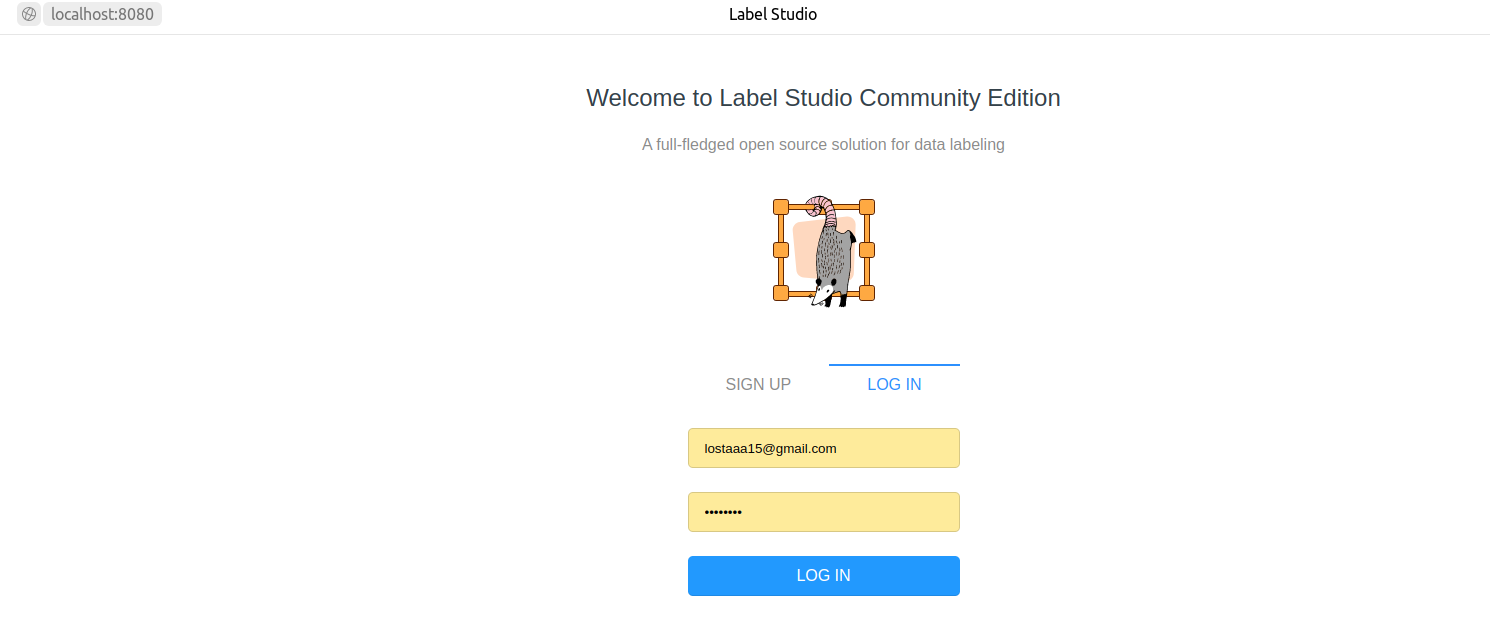

##Препроцессинг данных


### Данные представляют собой обсуждения с reddit-а на тему "Звездные войны".

### В первом файле хранятся заголовки обсуждений, во втором - комментарии к этим обсуждениям. Объедините комментарии по принципу: комментарий/заголовок обсуждения + ответ на него. Должно получиться минимум 15-20 таких пар, желательно брать комментарии с разным comment_parent_id. Убедитесь, что данные не нужно подвергать препроцессингу. Если необходимо это сделать, используйте библиотеку nltk

In [ ]:
import pandas as pd
import nltk

In [ ]:
star_wars = pd.read_csv('/content/StarWars_newsubreddit_preprocessed.csv', sep = '\t')

In [ ]:
star_wars

,title,score,id,author,url,comms_num,created,body
0,New Star Wars fan here - Why don't non-force u...,4598,12668a3,TripleChocolate123,https://i.redd.it/6gkj3s1tvrqa1.jpg,876,1.680137e+09,NaN
1,"This ain't no april fools, this is the opening...",6208,12bxrjp,kleseusxz,https://i.redd.it/t89azti0uxra1.png,288,1.680645e+09,NaN
2,My wife said I could order a new Barbecue and ...,17983,11kmstj,BlacksheepEDC,https://i.redd.it/65lzmu6ru9ma1.jpg,443,1.678157e+09,NaN
3,Kane in the Mandalorian where's a red badge wi...,721,12cj6zc,Arkangel_Ash,https://www.reddit.com/gallery/12cj6zc,261,1.680699e+09,NaN
4,Am I the only 1 who prefers the old Mando suit...,6229,11gu90k,IceAndFire23,https://i.redd.it/1eiek51emila1.jpg,746,1.677827e+09,NaN
...,...,...,...,...,...,...,...,...
238,Im surprised no Special Edition changed the Op...,0,10ltvtc,Skibot99,https://i.redd.it/sjmnboke2gea1.jpg,75,1.674746e+09,NaN
239,Four lightsabers in the new Mandalorian sneak ...,0,11c9j16,DarthBalls1976,https://www.reddit.com/r/StarWars/comments/11c...,12,1.677402e+09,NaN
240,New Rul: Any New Star Wars content should be w...,0,119yl2s,pleschga,https://www.reddit.com/r/StarWars/comments/119...,14,1.677161e+09,"My gosh. Recently binged through ""The Clone Wa..."
241,Absolutely love this new Star Wars pinball!,13,11jp2u7,PeeB4uGoToBed,https://i.redd.it/yrhi1v0le3ma1.png,2,1.678079e+09,NaN


In [ ]:
star_wars_comments = pd.read_csv('/content/StarWars_newsubreddit_preprocessed_comments.csv', sep = '\t')

In [ ]:
star_wars_comments

,comment_id,comment_author,comment_parent_id,comment_body,comment_link_id
0,izx4zfk,The_FriendliestGiant,t3_zjyvrr,In the aftermath of the Emperor using a strong...,t3_zjyvrr
1,izww5m7,James0nJuiceb0x,t3_zjyvrr,They demilitarized as a response to the Empire...,t3_zjyvrr
2,izx5a7l,2hats4bats,t3_zjyvrr,"Chancellor Mon Mothma passed the ""Military Dis...",t3_zjyvrr
3,izxxdcs,EndlessTheorys_19,t3_zjyvrr,The NR was heavily demilitarised. Instead of a...,t3_zjyvrr
4,izwvy99,DoctorUnderhill97,t3_zjyvrr,The Republic was demilitarized. It didn't have...,t3_zjyvrr
...,...,...,...,...,...
82,jcyq09c,imtrinichadian,t1_jcypmhm,it sounds like bad writing to rehash old movie...,t3_zjyvrr
83,izz38i8,Borghal,t1_izyzuoh,"There is a difference between ""no fleet"" and ""...",t3_zjyvrr
84,izz5mxp,DoctorUnderhill97,t1_izz38i8,I hope you feel good about how you spend your ...,t3_zjyvrr
85,izza7vq,Borghal,t1_izz5mxp,It is a worthy fight!,t3_zjyvrr


In [ ]:
import json

result = []

for index, row in star_wars_comments.iterrows():
    parent_id = row['comment_parent_id']
    
    if parent_id.split('_')[1] in star_wars_comments['comment_id'].to_list():
      parent_idx = star_wars_comments['comment_id'].to_list().index(parent_id.split('_')[1])
      parent_comment_body = star_wars_comments.loc[parent_idx, 'comment_body']
      answer_comment_body = star_wars_comments.loc[index ,'comment_body']
    if parent_id.split('_')[1] in star_wars['id'].to_list():
      parent_idx = star_wars['id'].to_list().index(parent_id.split('_')[1])
      parent_comment_body = star_wars.loc[parent_idx, 'title']
      answer_comment_body = star_wars_comments.loc[index ,'comment_body']
    
        
        # Создаем словарь для текущего элемента
      item = {
          "id": index,
          "dialogs": f"<div style=\"max-width: 750px\"><div style=\"clear: both\"><div style=\"float: right; display: inline-block; border: 1px solid #F2F3F4; background-color: #F8F9F9; border-radius: 5px; padding: 7px; margin: 10px 0;\"><p><b>USER1:</b>: {parent_comment_body}</p></div></div><div style=\"clear: both\"><div style=\"float: right; display: inline-block; border: 1px solid #F2F3F4; background-color: #F8F9F9; border-radius: 5px; padding: 7px; margin: 10px 0;\"><p><b>USER2:</b>{answer_comment_body}</p></div></div>"
          }
        
        # Добавляем словарь в список результатов
      result.append(item)

# Сохраняем результат в JSON-файл
with open("output5.json", "w") as outfile:
    json.dump(result, outfile)

##Cоздайте проект

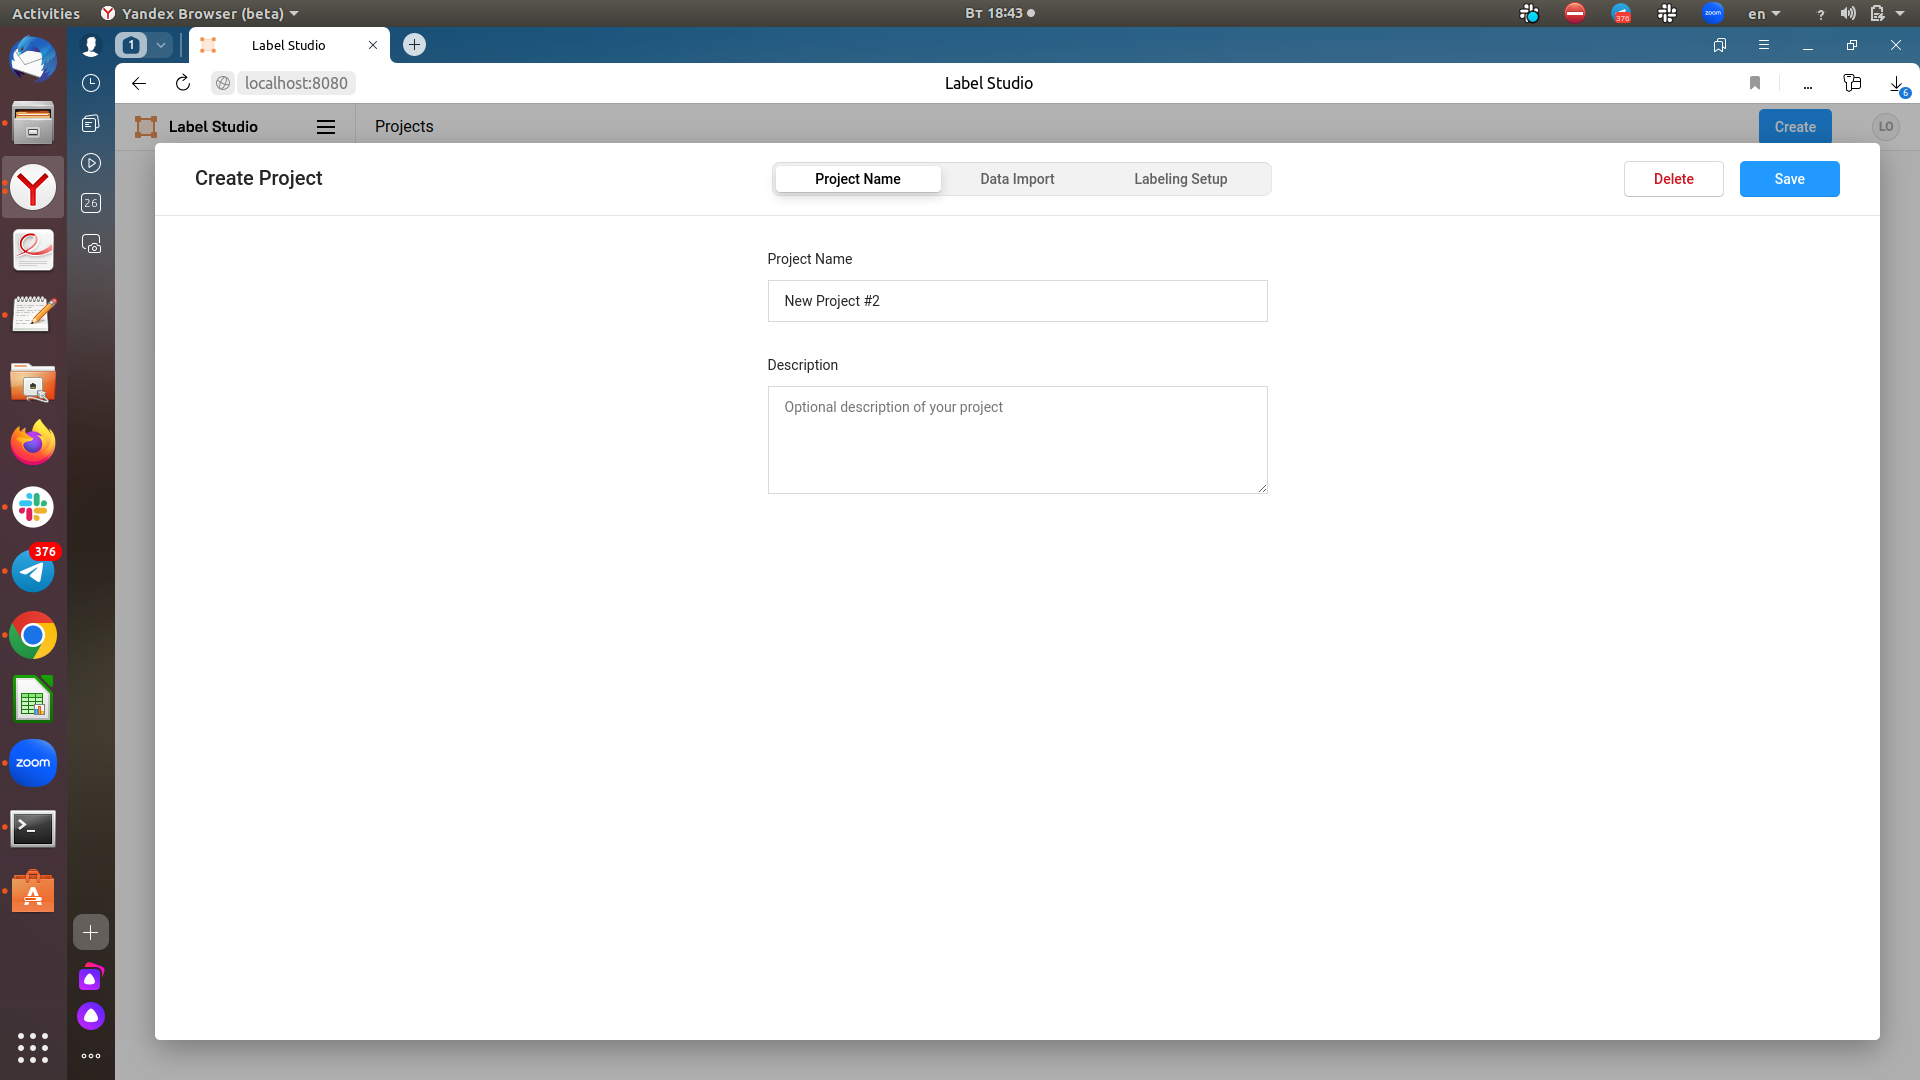

##Выбираем шаблон Conversational AI ---> "Response Selection"

### Задачи по интерфейсу:


*   Добавить вопрос про токсичность 
*   Добавить выделение токсичных слов с условием, что в диалоге встречаются токсичные фразы 
*   Добавить выделение opinion/fact по предложениям



In [ ]:
# <View>
#   <HyperText name="dialog" value="$dialogs"/>

#   <Header value="Rate last answer"/>
#   <Choices name="rating" choice="single-radio" toName="dialog" showInline="true">
#     <Choice value="Bad answer"/>
#     <Choice value="Neutral answer"/>
#     <Choice value="Good answer"/>
#   </Choices>

#   <Header value="Write your answer and press Enter"/>
#   <TextArea toName="dialog" name="answer"/>
# </View>





---



# Streamlit

###Устанавливаем streamlit локально


In [ ]:
pip install streamlit


In [ ]:
streamlit activate 
#Необходимо ввести почту

In [ ]:
#Запустить streamlit
streamlit hello

In [ ]:
cd my_project
python -m venv .venv
source .venv/bin/activate

In [ ]:
streamlit run myfile.py



---



Весь код запускается локально в файле .py

In [ ]:
import streamlit as st

In [ ]:
#Добавляем заголовок
st.title('My Streamlit App')

In [ ]:
#Добавляем текст
st.write('Welcome to my first Streamlit app!')

In [ ]:
name = st.text_input('Enter your name', 'John Doe') #окно для ввода текста
age = st.slider('Select your age', 0, 100, 25) 
submitted = st.button('Submit')

In [ ]:
if submitted:
    st.write(f'Hello {name}, your age is {age}!')

In [ ]:
import pandas as pd
data = pd.DataFrame({'x': [1, 2, 3], 'y': [4, 2, 5]})
st.line_chart(data)

In [ ]:
streamlit run myfile.py

##Визуализация

Пример визуализации данных

In [ ]:
#Загружаем данные
@st.cache
def get_data_deputies():
     return pd.read_csv('df_dep.csv'))
@st.cache
def get_data_political_parties():
     return pd.read_csv('df_polpar.csv'))

In [ ]:
#configuration of the page
st.set_page_config(layout="wide")
#load dataframes
df_dep = get_data_deputies()
df_pol_par = get_data_political_parties()
st.title('French national assembly vizualisation tool')
st.markdown("""
This app performs simple visualization from the open data from the french national assembly!
""")
st.write(df_dep)
st.write(df_pol_par)

In [ ]:
#Делаем визуализацию интерактивной
st.sidebar.header('Select what to display')
pol_parties = df_dep['pol party'].unique().tolist()
pol_party_selected = st.sidebar.multiselect('Political parties', pol_parties, pol_parties)
nb_deputies = df_dep['pol party'].value_counts()
nb_mbrs = st.sidebar.slider("Number of members", int(nb_deputies.min()), int(nb_deputies.max()), (int(nb_deputies.min()), int(nb_deputies.max())), 1)

In [ ]:
#creates masks from the sidebar selection widgets
mask_pol_par = df_dep['pol party'].isin(pol_party_selected)
#get the parties with a number of members in the range of nb_mbrs
mask_mbrs = df_dep['pol party'].value_counts().between(nb_mbrs[0], nb_mbrs[1]).to_frame()
mask_mbrs= mask_mbrs[mask_mbrs['pol party'] == 1].index.to_list()
mask_mbrs= df_dep['pol party'].isin(mask_mbrs)

In [ ]:
df_dep_filtered = df_dep[mask_pol_par & mask_mbrs]
st.write(df_dep_filtered)

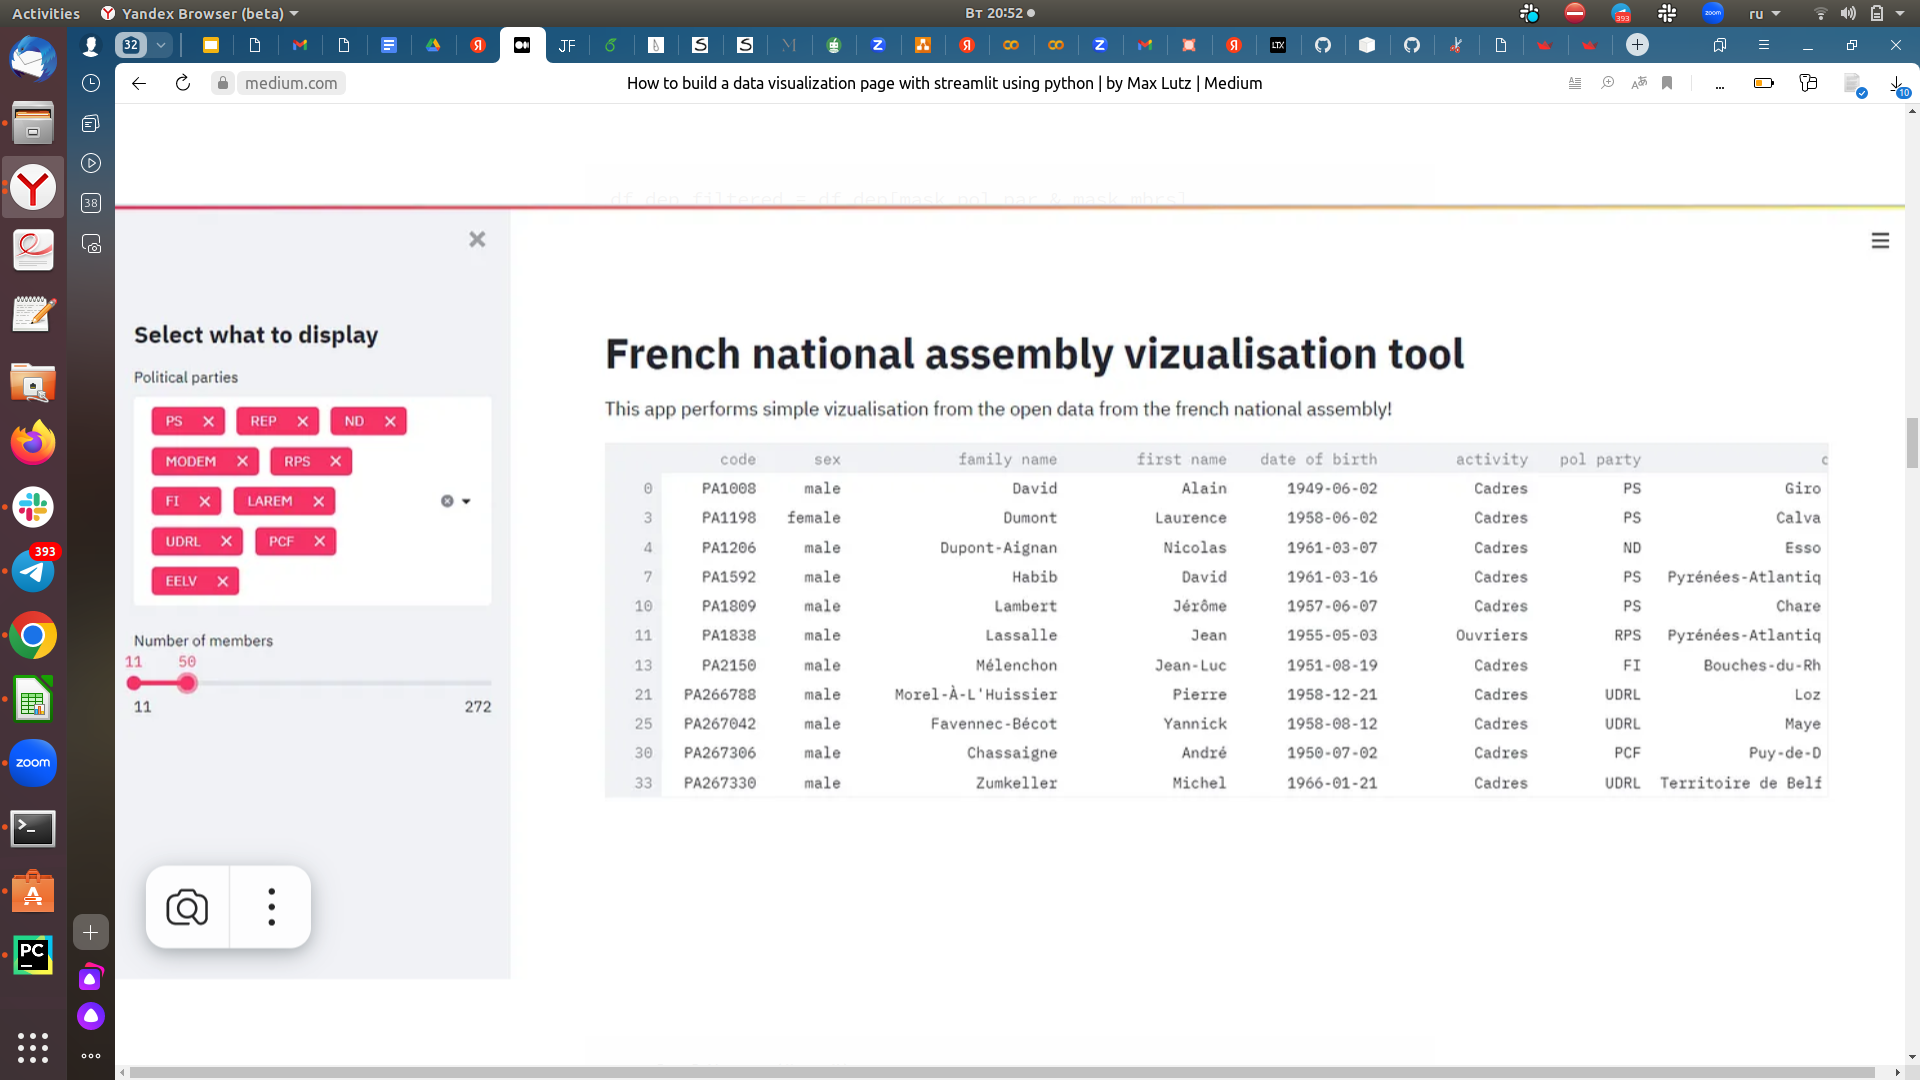

In [ ]:
matplotlib.use("agg")
_lock = RendererAgg.lock

In [ ]:
pol_par = df_dep_filtered['pol party'].value_counts()
#merge the two dataframe to get a column with the color
df = pd.merge(pd.DataFrame(pol_par), df_pol_par, left_index=True, right_on='abreviated_name')
colors = df['color'].tolist()

In [ ]:
row0_spacer1, row0_1, row0_spacer2, row0_2, row0_spacer3 = st.beta_columns((0.2, 1, .2, 1, .2))
with row0_1, _lock:
    st.header("Political parties")
    fig, ax = plt.subplots(figsize=(5, 5))
    ax.pie(pol_par, labels=(pol_par.index + ' (' + pol_par.map(str)
    + ')'), wedgeprops = { 'linewidth' : 7, 'edgecolor' : 'white'
    }, colors=colors)
    #display a white circle in the middle of the pie chart
    p = plt.gcf()
    p.gca().add_artist(plt.Circle( (0,0), 0.7, color='white'))
    st.pyplot(fig)

In [ ]:
with row0_2:
    df = df.reset_index(drop=True)
    t = ''
    for i in range(len(df)):
       t=t+df.loc[i,'abreviated_name']+' : '+df.loc[i,'name']+'  \n'
    for i in range(5):
       st.write("")
    st.write(t)

In [ ]:
df = df_dep[mask_pol_par & mask_mbrs]
df_sex = pd.concat([df, pd.get_dummies((df)['sex'], prefix='sex')],axis=1)
#we group by political parties and sum the male and female
df_sex = df_sex.groupby(['pol party']).agg({'sex_female':'sum','sex_male':'sum'})
#calculate the proportion of women per parties
df_sex['pol party'] = df_sex.index
df_sex['total'] = df_sex['sex_female'].astype(int) + df_sex['sex_male']
df_sex['ratio_f'] = df_sex['sex_female']/df_sex['total']

In [ ]:
df_sex = pd.merge(df_sex, df_pol_par, left_index=True, right_on='abreviated_name')
df_sex = df_sex.sort_values(by=['ratio_f'], ascending=False)
colors = df_sex['color'].tolist()

In [ ]:
row2_spacer1, row2_1, row2_spacer2, row2_2, row2_spacer3 = st.beta_columns((0.2, 1, .2, 1, .2))
with row2_1, _lock:
    st.header('Women deputies')
    fig, ax = plt.subplots(figsize=(5, 5))
    sns.barplot(x="ratio_f", y="pol party", data=df_sex, 
    ax=ax, palette=colors)
    ax.set_ylabel('Political party')
    ax.set_xlabel('Percentage of women deputies')
    i = 0
    text = (df_sex['ratio_f'].round(2)*100).astype(int).to_list()
    for rect in ax.patches:
        height = rect.get_height()
        ax.text(rect.get_x() + rect.get_width() / 2., rect.get_y()   
        + height * 3 / 4., str(text[i])+'%', ha='center',    
        va='bottom', rotation=0, color='white', fontsize=12)
        i = i + 1
    st.pyplot(fig)

##Пример GUI для аннотации

In [ ]:
import os
import random

import streamlit as st


def show():
    st.write(
        """
        ## 📚 Text Annotation

        Welcome to the text annotation tool! Label some text and all of your
        annotations will be preserved in `st.session_state`!
        """
    )

    data = [
        "I love this movie! It's so entertaining.",
        "This book is boring and poorly written.",
        "The food at that restaurant was delicious.",
        "I had a terrible experience with their customer service.",
        "The weather today is perfect for outdoor activities.",
    ]

    if "annotations" not in st.session_state:
        st.session_state.annotations = {}
        st.session_state.data = data.copy()
        st.session_state.current_text = data[0]

    def annotate(label):
        st.session_state.annotations[st.session_state.current_text] = label
        if st.session_state.data:
            st.session_state.current_text = random.choice(st.session_state.data)
            st.session_state.data.remove(st.session_state.current_text)

    st.write("")
    col1, col2 = st.beta_columns(2)
    with col1:
        if st.session_state.data:
            st.write(
                "Annotated:",
                len(st.session_state.annotations),
                "– Remaining:",
                len(st.session_state.data),
            )
            st.write("### Text")
            st.write(st.session_state.current_text)
            st.button("Positive 😄", on_click=annotate, args=("positive",))
            st.button("Negative 😞", on_click=annotate, args=("negative",))
            st.button("Neutral 😐", on_click=annotate, args=("neutral",))
        else:
            st.success(
                f"🎉 Done! All {len(st.session_state.annotations)} texts annotated."
            )
    with col2:
        st.write("### Annotations")
        st.write(st.session_state.annotations)


if __name__ == "__main__":
    show()

#Gradio

In [2]:
!pip install gradio

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 19.9/19.9 MB 33.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 38.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.0/57.0 kB 5.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 288.1/288.1 kB 24.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.4/75.4 kB 7.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 224.5/224.5 kB 11.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.5/50.5 kB 4.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 135.8/135.8 kB 13.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 45.7/45.7 kB 4.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.3/58.3 kB 5.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.9/129.9 

In [3]:
import numpy as np
import gradio as gr


def flip_text(x):
    return x[::-1]



with gr.Blocks() as demo:
    gr.Markdown("Flip text or image files using this demo.")
    with gr.Tab("Flip Text"):
        text_input = gr.Textbox()
        text_output = gr.Textbox()
        text_button = gr.Button("Flip")

    with gr.Accordion("Open for More!"):
        gr.Markdown("Look at me...")

    text_button.click(flip_text, inputs=text_input, outputs=text_output)
demo.launch()

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
Note: opening Chrome Inspector may crash demo inside Colab notebooks.

To create a public link, set `share=True` in `launch()`.


<IPython.core.display.Javascript object>